# Question that I want to answer from this exploration
1. People who get likes the most
2. People who post the most
2. Is the people who send many posts also get many likes?
3. On what month people usually send post the most?
4. Is good for posting post sequential? Based on like score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Instagram_Data.csv')

## Analysis the data first


In [2]:
df.describe()
df.isnull().any()
df.dtypes

User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object

## 1. People who get likes the most

In [3]:
likes_count_df = df.groupby(['User uuid'])['Likes'].sum().reset_index()
likes_count_df.sort_values(by='Likes', ascending=False)

,User uuid,Likes
697,698,940939106
332,333,482802384
126,127,404650194
146,147,393906111
134,135,292503813
...,...,...
1029,1030,135
772,773,98
989,990,71
780,781,54


### What is the profile of likes that people get

In [4]:
likes_count_df = likes_count_df.drop('User uuid', axis=1)
likes_count_df.describe()

,Likes
count,1.089000e+03
mean,7.062910e+06
std,4.111295e+07
min,3.400000e+01
25%,1.793600e+04
50%,1.699760e+05
75%,1.893114e+06
max,9.409391e+08


### This is the histogram of the likes
I chunk it into five sections to see its distribution

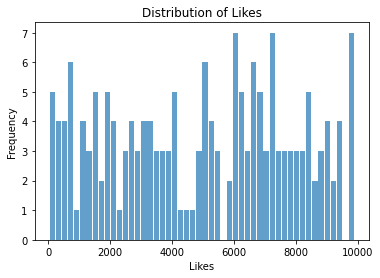

In [5]:
df_to_plot = likes_count_df[likes_count_df['Likes'] < 10000]
plt.hist(df_to_plot, bins=50, alpha=0.7, rwidth=0.85)
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()

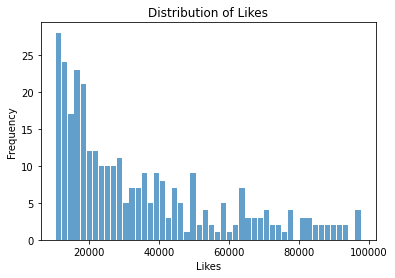

In [6]:
df_to_plot = likes_count_df[(likes_count_df['Likes']>10000) & (likes_count_df['Likes']<100000)]
plt.hist(df_to_plot, bins=50, alpha=0.7, rwidth=0.85)
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()

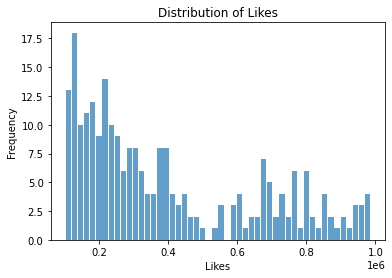

In [7]:
df_to_plot = likes_count_df[(likes_count_df['Likes']>100000) & (likes_count_df['Likes']<1000000)]
plt.hist(df_to_plot, bins=50, alpha=0.7, rwidth=0.85)
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()

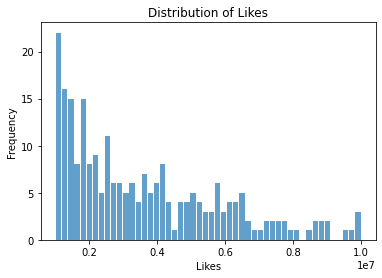

In [8]:
df_to_plot = likes_count_df[(likes_count_df['Likes']>1000000) & (likes_count_df['Likes']<10000000)]
plt.hist(df_to_plot, bins=50, alpha=0.7, rwidth=0.85)
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()

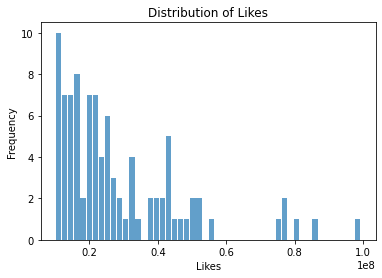

In [9]:
df_to_plot = likes_count_df[(likes_count_df['Likes']>10000000) & (likes_count_df['Likes']<100000000)]
plt.hist(df_to_plot, bins=50, alpha=0.7, rwidth=0.85)
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()

## 2. People who post the most
Most people 64% (700 from 1089 users) send 200 posts which is the maximum post per user in this data

In [10]:
df.groupby(['User uuid']).count().sort_values(by='Likes', ascending=False)

,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
User uuid,,,,,,,,,,,,
545,200,200,200,200,200,200,200,200,200,200,200,200
671,200,200,200,200,200,200,200,200,200,200,200,200
651,200,200,200,200,200,200,200,200,200,200,200,200
652,200,200,200,200,200,200,200,200,200,200,200,200
653,200,200,200,200,200,200,200,200,200,200,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...
621,20,20,20,20,20,20,20,20,20,20,20,20
780,20,20,20,20,20,20,20,20,20,20,20,20
265,20,20,20,20,20,20,20,20,20,20,20,20


### This is the histogram of post count
700-ist people send 200 posts

(array([ 20.,  25.,   8.,  11.,   4.,  14.,  13.,   9.,  12.,   7.,  13.,
          8.,   5.,  11.,   2.,   7.,   8.,   5.,   4.,   7.,   7.,   6.,
          6.,   8.,   4.,   9.,   5.,   8.,   4.,   8.,   9.,   4.,   3.,
          7.,   7.,   3.,   5.,   5.,  10.,   2.,   5.,   4.,   1.,   4.,
          1.,   7.,   8.,   3.,   4., 739.]),
 array([ 20. ,  23.6,  27.2,  30.8,  34.4,  38. ,  41.6,  45.2,  48.8,
         52.4,  56. ,  59.6,  63.2,  66.8,  70.4,  74. ,  77.6,  81.2,
         84.8,  88.4,  92. ,  95.6,  99.2, 102.8, 106.4, 110. , 113.6,
        117.2, 120.8, 124.4, 128. , 131.6, 135.2, 138.8, 142.4, 146. ,
        149.6, 153.2, 156.8, 160.4, 164. , 167.6, 171.2, 174.8, 178.4,
        182. , 185.6, 189.2, 192.8, 196.4, 200. ]),
 <BarContainer object of 50 artists>)

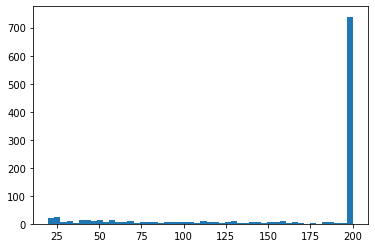

In [11]:
plt.hist(df.groupby(['User uuid']).count()['Likes'], bins=50)

### Is the people who send many posts also get many likes?

People who got likes more likes than average likes that people get is 136 of 1089 people

In [12]:
post_count_df = df.groupby(['User uuid']).count()['Likes'].reset_index()
likes_count_df = df.groupby(['User uuid'])['Likes'].sum().reset_index()

#to get like/post
likes_count_perpost = (likes_count_df['Likes'] / post_count_df['Likes']).reset_index()

#avg like
avg_likes_count_df = df.groupby(['User uuid'])['Likes'].mean().mean()

#people who got more like/post > avg likes --> 136 people of 1089 people
likes_count_perpost[likes_count_perpost['Likes'] > avg_likes_count_df].shape[0]

136

In [13]:
likes_count_df['Hasil pembagian'] = df['Likes'] / df['Likes Score']

## 3. On what month people usually send post the most?
January is month when people send post the most

In [14]:
from datetime import datetime

df['Formatted Date Posted'] = df.apply(lambda x: datetime.strptime(x['Date Posted'], '%Y-%m-%d  %H:%M:%S').date(), axis=1)
df_grouped = df.groupby(['Formatted Date Posted']).agg({'Type':'count', 'Numer of Comments':'mean', 'Likes':'min'}).reset_index().rename(columns={'Type':'Post_count'})

df_grouped.sort_values(['Post_count'], ascending=False)

,Formatted Date Posted,Post_count,Numer of Comments,Likes
2849,2021-01-01,578,285.128028,0
2890,2021-02-11,554,208.546931,0
2885,2021-02-06,553,283.292948,0
2889,2021-02-10,534,260.308989,2
2841,2020-12-24,529,2769.727788,0
...,...,...,...,...
598,2014-10-27,1,12.000000,512
402,2014-03-23,1,1.000000,111
160,2013-06-18,1,11.000000,36
614,2014-11-13,1,377.000000,13384


In [15]:
df_grouped = df.groupby(['Month']).Type.count().reset_index().rename(columns={'Type':'Posting Count'})
df_final = df_grouped[df_grouped['Posting Count'] == df_grouped['Posting Count'].max()]

df_final

,Month,Posting Count
0,1,21538


In [16]:
df[df['Days passed from post'] == 1].sort_values(['Days passed from post', 'User uuid']).head(50)

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute,Formatted Date Posted
163478,1000,638,1,0.29,Image,7,31,2021-02-26 18:24:35,2021,2,26,18,24,2021-02-26
163479,1000,1141,1,0.52,Image,6,46,2021-02-26 02:40:12,2021,2,26,2,40,2021-02-26
163480,1000,965,1,0.44,Images,3,30,2021-02-25 23:39:44,2021,2,25,23,39,2021-02-25
163481,1000,682,1,0.31,Images,12,13,2021-02-25 22:44:26,2021,2,25,22,44,2021-02-25
163919,1003,138,1,0.17,Image,4,0,2021-02-26 20:45:35,2021,2,26,20,45,2021-02-26
163920,1003,183,1,0.23,Image,6,3,2021-02-26 18:53:26,2021,2,26,18,53,2021-02-26
163921,1003,228,1,0.28,Image,6,1,2021-02-26 16:12:15,2021,2,26,16,12,2021-02-26
164307,1005,14,1,0.44,Images,0,1,2021-02-26 03:21:22,2021,2,26,3,21,2021-02-26
164582,1007,9515,1,0.59,Video,0,222,2021-02-26 21:38:16,2021,2,26,21,38,2021-02-26
164583,1007,9893,1,0.61,Video,0,431,2021-02-26 08:57:41,2021,2,26,8,57,2021-02-26


## 4. Will Likes Score will increase when users send posts sequentially?
Likes score will decrease until 8% if the user send post sequentially
The idea is sorting data based on user uuid and date posted, I want to compare the data today and yesterday, is there any increment in the like score. If there is an increment, then I labelled it to true, vice versa. 
To drive conclusion, I calculate how much true (like score increases), and how much the false
I got the false is more than the true ones

The next question is how much is the impact of sending posts sequentially?
To answer that question, I make calculation on: <br/>
(avg Likes Score value of sequential post - avg Likes Score value of non sequential post) / avg Likes Score value of non sequential post

In [5]:
%%time

import datetime as datetime

df_group = df.groupby(['User uuid', 'Year', 'Month', 'Day'])['Likes Score'].mean().reset_index()

df_group['Date Posted'] = df_group[['Year', 'Month', 'Day']].apply(lambda x: datetime.datetime(year=x['Year'], month=x['Month'], day=x['Day']), axis =1)
df_group = df_group.sort_values(['User uuid', 'Date Posted'])
df_group['Tomorrow'] = df_group.apply(lambda x: x['Date Posted'] + datetime.timedelta(days=1), axis=1) 
df_group['Yesterday'] = df_group.apply(lambda x: x['Date Posted'] - datetime.timedelta(days=1), axis=1)
df_group['Date Posted Bawahnya'] = df_group['Date Posted'].shift(-1)

df_group['Date Posted Atasnya'] = df_group['Date Posted'].shift(1)

df_sequential = df_group[(df_group['Tomorrow'] == df_group['Date Posted Bawahnya']) | (df_group['Yesterday'] == df_group['Date Posted Atasnya'])]

Date_Posted_array = df_sequential['Date Posted'].values

index_sequential = []
index = 0

for i in range(len(Date_Posted_array)):
    if i != 0:
            if Date_Posted_array[i] != pd.to_datetime(Date_Posted_array[i-1]) + datetime.timedelta(days=1):
                index += 1
    index_sequential.append(index)
    
df_sequential['index_sequential'] = index_sequential

df_sequential['Next_day_Likes_Score'] = df_sequential['Likes Score'].shift(-1)
df_sequential['Next_day_growth_Likes_Score'] = df_sequential['Next_day_Likes_Score'] - df_sequential['Likes Score']
df_sequential_removelast = df_sequential[df_sequential['Tomorrow'] == df_sequential['Date Posted Bawahnya']]
df_sequential

df_sequential_grouped = df_sequential_removelast.groupby(['index_sequential']).Next_day_growth_Likes_Score.sum()

(df_sequential_grouped < 0).reset_index(drop=True).value_counts(normalize=True)

CPU times: user 10.9 s, sys: 129 ms, total: 11 s
Wall time: 11.1 s


<timed exec>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


False    0.528852
True     0.471148
Name: Next_day_growth_Likes_Score, dtype: float64

In [ ]:
df_sequential_like_score_mean = df_sequential.groupby(['User uuid','index_sequential'])['Likes Score'].mean().reset_index()
df_sequential_like_score_mean = df_sequential.groupby(['User uuid'])['Likes Score'].mean().reset_index()
sequential_mean = df_sequential_like_score_mean.mean()

In [ ]:
df_sequential_like_score_mean = df_sequential.groupby(['User uuid','index_sequential'])['Likes Score'].mean().reset_index()
df_sequential_like_score_mean

In [ ]:
df_sequential_like_score_mean= df_sequential.groupby(['User uuid'])['Likes Score'].mean().reset_index()
df_sequential_like_score_mean

In [ ]:
sequential_mean = df_sequential_like_score_mean.mean()
sequential_mean

In [ ]:
df_not_sequential = df_group[(df_group['Tomorrow'] != df_group['Date Posted Bawahnya']) & (df_group['Yesterday'] != df_group['Date Posted Atasnya'])]
df_not_sequential = df_not_sequential.groupby(['User uuid'])['Likes Score'].mean().reset_index()
not_sequential_mean = df_not_sequential.mean()
not_sequential_mean['Likes Score']

In [ ]:
display('df_not_sequential', 'df_sequential_like_score_mean', "pd.merge(df_not_sequential, df_sequential_like_score_mean, on='User uuid')")

In [ ]:
df_comparison = pd.merge(df_not_sequential, df_sequential_like_score_mean, on='User uuid')

In [ ]:
df_comparison['is_sequential_win'] = df_comparison['Likes Score_x'] > df_comparison['Likes Score_y']
df_comparison
mean = (sequential_mean['Likes Score'] - not_sequential_mean['Likes Score'])/ not_sequential_mean['Likes Score']
mean

### Insight: if we send post sequentientially for at least two days, we will get lost like scores for 8%

## Can Likes Score derive from Likes?
Likes Score didn't related to likes and days passed for post 

In [18]:
df['day_passed_related_likes_score'] = (df['Likes']/df['Days passed from post'] - df['Likes Score'] <= 0.1)
df['day_passed_related_likes_score'].value_counts()

False    140896
True      38026
Name: day_passed_related_likes_score, dtype: int64